In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
%matplotlib inline



data = pd.read_csv('Autism_Data.arff')
pd.pandas.set_option('display.max_columns',None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

df = pd.DataFrame(data)
df_eda = pd.DataFrame(data)

In [28]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [29]:
df.shape

(704, 21)

In [30]:
discrete_col = [col for col in df.columns if df[col].dtypes != 'O']
print(discrete_col)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'result']


In [31]:
categorical_col = [col for col in df.columns if df[col].dtypes == 'O']
print(categorical_col)

['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']


# Find Null Values

In [32]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

# Feature Engineering

In [33]:
# holds numerical values
numerical_col = [feature for feature in df.columns if df[feature].dtypes != 'O']

# holds categorical values
categorical_col = [feature for feature in df.columns if df[feature].dtypes == 'O']

#### the null values are represented as ? sign, I ll transform it to a null for better handling

In [34]:
for col in df.columns:
    df[col].fillna(df[col].mode(),inplace=True)

## Label Encoding

In [35]:
le = LabelEncoder()
for feature in categorical_col:
   df[feature] =  le.fit_transform(df[feature])

In [36]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,9,0,10,0,0,10,0,6,0,5,0
1,1,1,0,1,0,0,0,1,0,1,7,1,6,0,1,25,0,5,0,5,0
2,1,1,0,1,1,0,1,1,1,1,10,1,6,1,1,61,0,8,0,3,1
3,1,1,0,1,0,0,1,1,0,1,18,0,10,0,1,10,0,6,0,5,0
4,1,0,0,0,0,0,0,1,0,0,24,0,2,0,0,32,0,2,0,1,0


# Feature Selection

<AxesSubplot:>

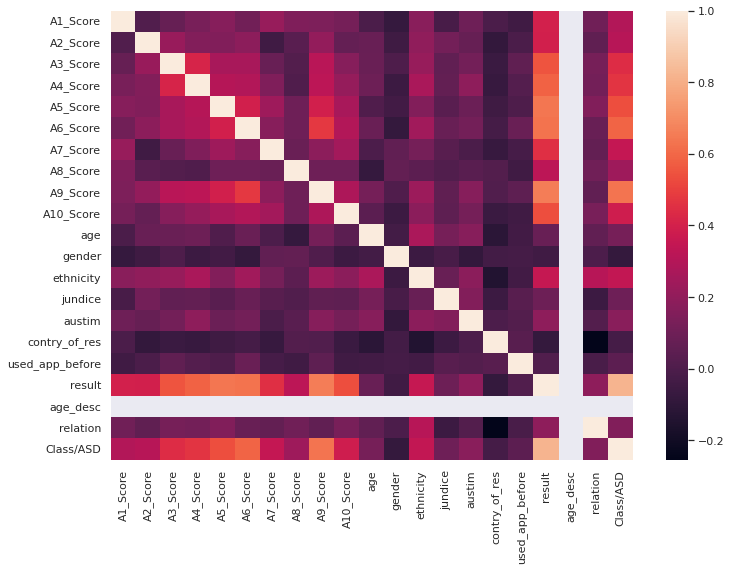

In [37]:
sns.heatmap(df.corr())

***
 here are the correlations between the columns: 
 
 
 ### columns that can't bring insights to the prediction are:
 - jundice, relation, A8
 
### Other Columns that have Enough Correlation are:
 - country_of_res, A9, gender and others
***


# Train_test_split and Standard Scaler

In [38]:
X = df.drop(['austim'],axis=1)

y = df['austim']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=True)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Model Training

In [41]:
# imports of the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [42]:
# models we will be using with the stratified k folds
lr = LogisticRegression(random_state=1)
lf = RandomForestClassifier(n_estimators=10,random_state=1)
kneighbors = KNeighborsClassifier(n_neighbors=15)
svc = SVC(kernel = "linear", gamma = 0.1, C = 0.1)


models = [kneighbors,lr,svc,lf]

In [43]:
for model in models:
    model.fit(X_train,y_train)
    print(model.__class__.__name__,"==",model.score(X_test,y_test),'%')

KNeighborsClassifier == 0.8865248226950354 %
LogisticRegression == 0.875886524822695 %
SVC == 0.8936170212765957 %
RandomForestClassifier == 0.8971631205673759 %


# SVC

In [44]:
Model = SVC(random_state=100,class_weight='balanced')

params = {'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
          'gamma':[10000,1000,100,10,1,0.1,0.001,0.0001,0.00001]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=SVC(class_weight='balanced', random_state=100),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [10000, 1000, 100, 10, 1, 0.1, 0.001, 0.0001,
                                   1e-05]},
             scoring='recall', verbose=1)

In [46]:
Model_best = grid_search.best_estimator_
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

0.14454976303317535


# Random Forest Classifier

In [49]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

params = {'n_estimators':[200],
          'min_samples_leaf':[2,5,10,50],
          'max_depth':[10,20,50],
          'max_features':[0.1,0,0.25,0],
          'criterion':["gini"]
         }

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/bob/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bob/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bob/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/bob/.local/lib/python3.9/site-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/home/bob/.local/lib/python3.9/site-packages/joblib/para

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50],
                         'max_features': [0.1, 0, 0.25, 0],
                         'min_samples_leaf': [2, 5, 10, 50],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [50]:
Model_best = grid_search.best_estimator_

In [53]:
from sklearn.metrics import plot_roc_curve, accuracy_score, recall_score
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

0.985781990521327


### this is the best accuracy so far